In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [208]:
df=pd.read_excel('G:\Machine learning projects\Flight_fare_prediction_\Data\Data_Train.xlsx')

In [209]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Explaing about the Data 

Airline                    -- Name of the Airline <br>
Date_of_journey            -- Journey_data<br>
source                     -- Starting place of journey<br>
Destination                -- End place of journey<br>
Route                      -- Route followed in journey<br>
Dep_time                   -- Depature Time<br>
Arrival_time               -- Arrival_time<br>
Duration                   -- Duration of the Journey<br>
Total_stops                -- Total stops for the journey<br>
Additional_info            -- Any comments or addtional information of the journey<br>
Price                      -- Price of the trip our Target Variable<br>

## Stage 1 Data Exploration

In [210]:
df.shape

(10683, 11)

In [211]:
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


#### Numerical features

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We have few variables with incorrect data types 

In [213]:
def change_data_type(df, columns, change_type):
    for column in columns:
        if change_type == 'int':
            df[column] = df[column].astype(int)
        elif change_type == 'float':
            df[column] = df[column].astype(float)
        elif change_type == 'object':
            df[column] = df[column].astype(object)
        elif change_type == 'datetime':
            df[column] = pd.to_datetime(df[column], errors='coerce')

In [214]:
date_columns=["Date_of_Journey","Arrival_Time","Dep_Time"]
change_data_type(df,date_columns,'datetime')

In [215]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-14 05:50:00,2023-11-14 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-14 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-11-14 18:05:00,2023-11-14 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-11-14 16:50:00,2023-11-14 21:35:00,4h 45m,1 stop,No info,13302


If we observe we have got arrival_time and dep_time as current experiment date we can leave that as it is as we extract hour and minutes and drop the respective columns

In [216]:
df["Month_of_journey"]=df.Date_of_Journey.dt.month
df["date_of_journey"]=df.Date_of_Journey.dt.day

In [217]:
def extract_hour(data,cols):
    for col in cols:
        df[col+"_hour"]=df[col].dt.hour

def extract_min(data,cols):
    for col in cols:
        df[col+"_min"]=df[col].dt.minute

In [218]:
extract_hour(df,['Arrival_Time','Dep_Time'])

In [219]:
extract_min(df,['Arrival_Time','Dep_Time'])

Let's all also convert Duratio into minutes so it becomes easy to analyse

In [220]:
def duration_to_minutes(duration):
    parts = duration.strip().split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

df['Duration_minutes'] = df['Duration'].apply(duration_to_minutes)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_journey,date_of_journey,Arrival_Time_hour,Dep_Time_hour,Arrival_Time_min,Dep_Time_min,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-11-14 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,1,22,10,20,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-11-14 05:50:00,2023-11-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,5,15,50,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-11-14 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,9,25,25,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-11-14 18:05:00,2023-11-14 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,18,30,5,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-11-14 16:50:00,2023-11-14 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,16,35,50,285


In [221]:
df.drop(['Duration','Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [222]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_journey,date_of_journey,Arrival_Time_hour,Dep_Time_hour,Arrival_Time_min,Dep_Time_min,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,1,22,10,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,5,15,50,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,9,25,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,18,30,5,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,16,35,50,285


Now lets differenciate numerical and categorical vaiables

Now we can drop the other columns which we have extarcted the info

In [223]:
categorical_variables=[x for x in df.columns if df[x].dtype=='O']
numerical_variables=[x for x in df.columns if df[x].dtype=='int64']

In [224]:
categorical_variables

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [225]:
numerical_variables

['Price',
 'Month_of_journey',
 'date_of_journey',
 'Arrival_Time_hour',
 'Dep_Time_hour',
 'Arrival_Time_min',
 'Dep_Time_min',
 'Duration_minutes']

### checking Missing values

In [226]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          1
Additional_Info      0
Price                0
Month_of_journey     0
date_of_journey      0
Arrival_Time_hour    0
Dep_Time_hour        0
Arrival_Time_min     0
Dep_Time_min         0
Duration_minutes     0
dtype: int64

we just have few missing values

## Checking Outliers

Let's see our target avriable has some outliers or not 

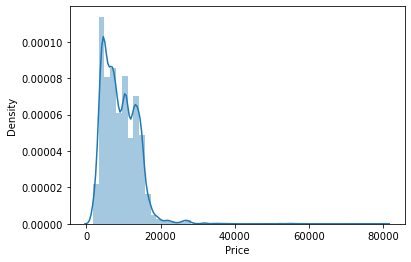

In [227]:
sns.distplot(df['Price'],label="price")
plt.show()

<AxesSubplot:xlabel='Price'>

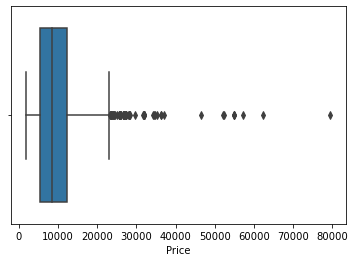

In [228]:
sns.boxplot(df['Price'])

### Numerical and Ctegorical Feature Analysis

#### Airline

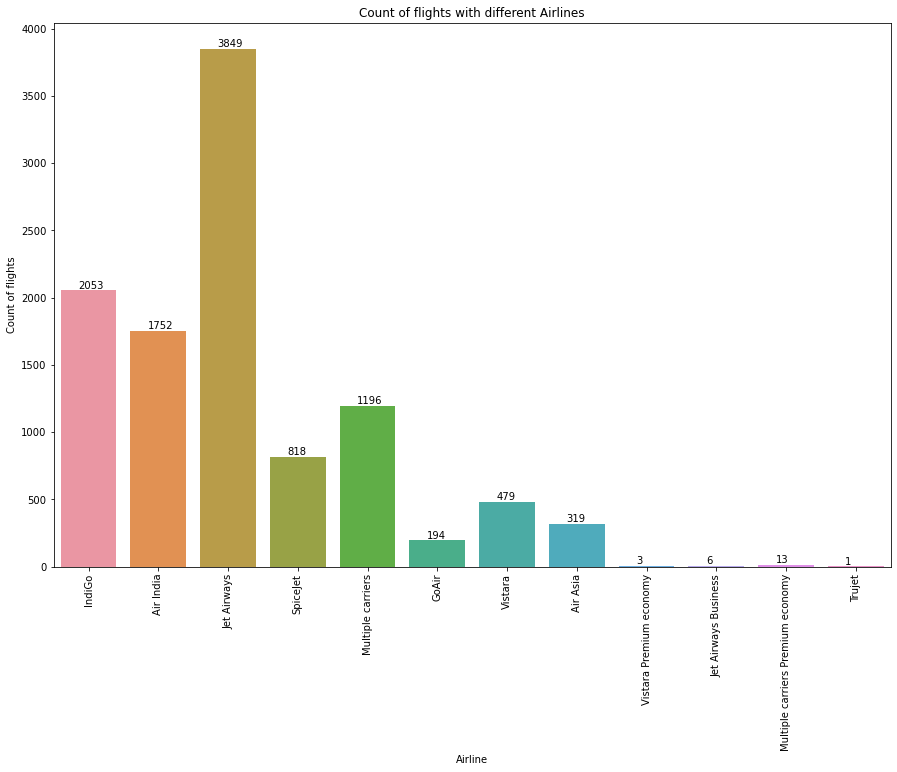

In [229]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

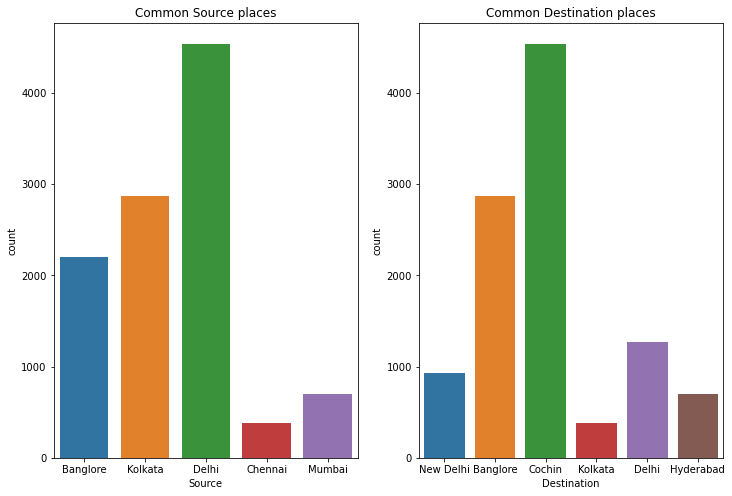

In [230]:
fig,axes=plt.subplots(1,2,figsize=(12,8))

sns.countplot(x=df["Source"],ax=axes[0])
axes[0].set_title("Common Source places")

sns.countplot(x=df['Destination'],ax=axes[1])
axes[1].set_title("Common Destination places")

plt.show()

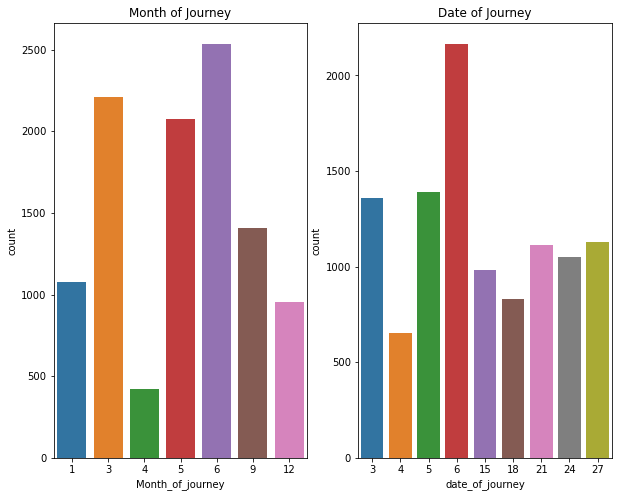

In [231]:
fig,axes=plt.subplots(1,2,figsize=(10,8))

sns.countplot(x=df["Month_of_journey"],ax=axes[0])
axes[0].set_title("Month of Journey")

sns.countplot(x=df['date_of_journey'],ax=axes[1])
axes[1].set_title("Date of Journey")

plt.show()

### Vs Price Analysis

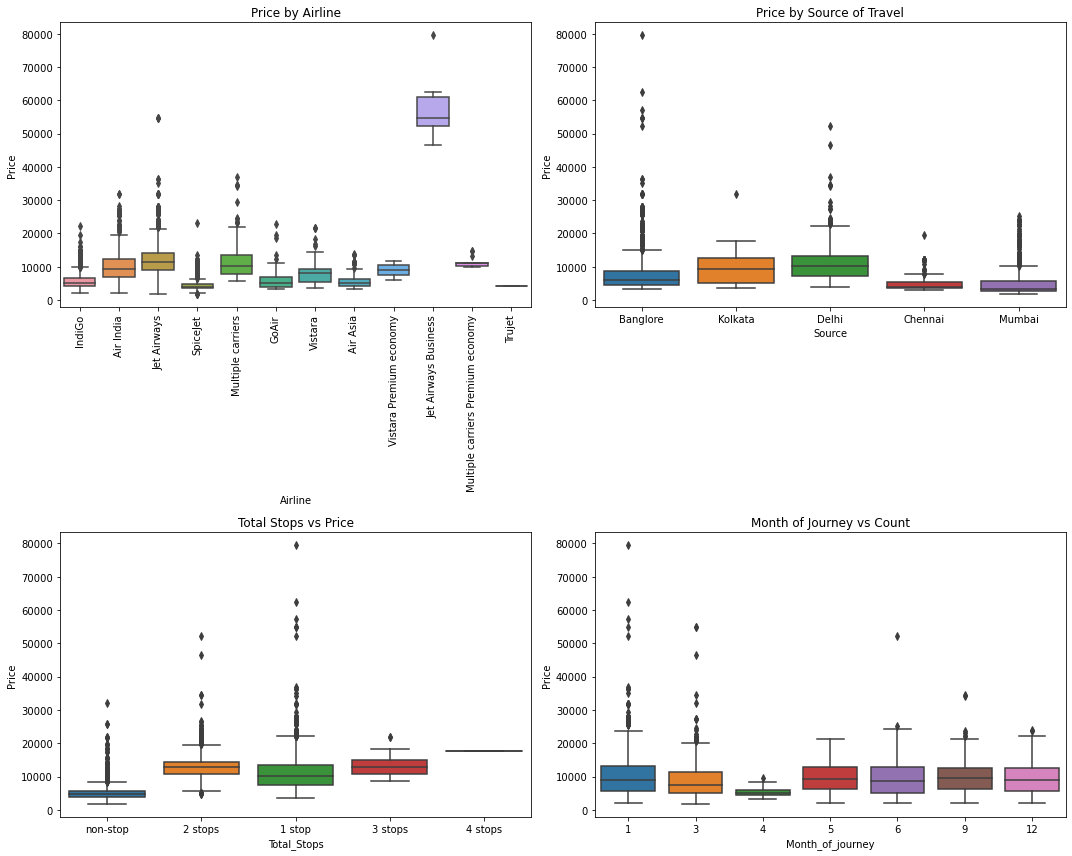

In [236]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot for 'Airline'
sns.boxplot(x='Airline', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Price by Airline")
axes[0, 0].set_xlabel('Airline')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=90)

# Boxplot for 'Source'
sns.boxplot(x='Source', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Price by Source of Travel")

# Boxplot for 'Total_Stops'
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Total Stops vs Price")

# Countplot for 'Month_of_journey'
sns.boxplot(x='Month_of_journey', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Month of Journey vs Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Now Let's try to Handling Missng values Outliers 

In [237]:
df.dropna(inplace=True)

In [238]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Total_Stops          0
Additional_Info      0
Price                0
Month_of_journey     0
date_of_journey      0
Arrival_Time_hour    0
Dep_Time_hour        0
Arrival_Time_min     0
Dep_Time_min         0
Duration_minutes     0
dtype: int64

### Outlier correction in Target varaible

In [239]:
df.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [240]:
df.Price.median()

8372.0

In [241]:
# Calculate the IQR
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bridges
lower_bridge = Q1 - (IQR * 1.5)
upper_bridge = Q3 + (IQR * 1.5)

print("Lower Bridge:", lower_bridge)
print("Upper Bridge:", upper_bridge)

Lower Bridge: -5367.0
Upper Bridge: 23017.0


In [242]:
# Calculate the lower and upper bridges
lower_bridge_ = Q1 - (IQR * 3)
upper_bridge_ = Q3 + (IQR * 3)

print("Lower Bridge:", lower_bridge_)
print("Upper Bridge:", upper_bridge_)

Lower Bridge: -16011.0
Upper Bridge: 33661.0


In [243]:
df.loc[df['Price'] > upper_bridge_, 'Price'] = upper_bridge_

<AxesSubplot:xlabel='Price', ylabel='Density'>

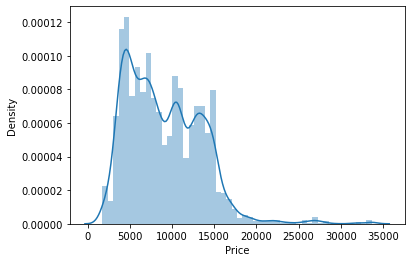

In [244]:
sns.distplot(df['Price'])

### Handling Categrocial variables

In [245]:
categorical_variables

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Airline,Sourse,Destination,Total_stops-One Hot Encoding <br>
Route -- label encoding

In [ ]:
We are Going to Perform One Hot encoding

In [248]:
df_test=pd.read_excel('G:\Machine learning projects\Flight_fare_prediction_\Data\Test_set.xlsx')